In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("flat_houses_v4.csv")

In [4]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'CITY_NAME', 'LOCALITY_NAME', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING',
       'FLOOR_NUM', 'TOTAL_FLOOR', 'LATITUDE', 'LONGITUDE', 'AVAILABILITY',
       'PRICE', 'PRICE_SQFT', 'PRICE_CR', 'AREA_SQFT', 'CALCULATED_AREA_SQFT',
       'AGE_POSSESSION', 'AMENITIES_CLUSTER', 'LUXURY_SCORE', 'PROP_NAME'],
      dtype='object')

<ipython-input-5-2ff25b476420>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PRICE_CR"])


<Axes: xlabel='PRICE_CR', ylabel='Density'>

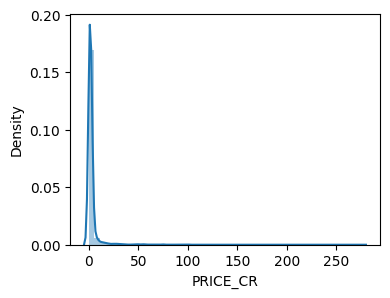

In [5]:
plt.figure(figsize = (4,3))
sns.distplot(df["PRICE_CR"])

<Axes: xlabel='PRICE_CR'>

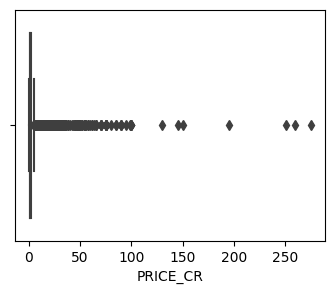

In [6]:
plt.figure(figsize = (4,3))
sns.boxplot(x = df["PRICE_CR"])

In [7]:
df["PRICE_CR"].describe()

count    7327.000000
mean        2.943877
std         9.441767
min         0.020000
25%         0.620000
50%         1.450000
75%         2.420000
max       275.000000
Name: PRICE_CR, dtype: float64

In [8]:
df["PRICE_CR"].quantile([0.90, 0.95, 0.98, 0.99,0.995])

0.900     3.65
0.950     8.00
0.980    21.00
0.990    39.48
0.995    58.74
Name: PRICE_CR, dtype: float64

99% of the properties are below 40 crores

In [9]:
# Calculate the IQR for the 'PRICE_CR' column
Q1 = df["PRICE_CR"].quantile(0.25)
Q3 = df["PRICE_CR"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify Outliers
outliers = df[(df['PRICE_CR'] < lower_bound) | (df['PRICE_CR'] > upper_bound)]

# number of outliers
num_outliers = outliers.shape[0]
print("num of outliers : ", num_outliers)

outliers_price_stats = outliers['PRICE_CR'].describe()
print("outliers stats : ")
print(outliers_price_stats)

num of outliers :  525
outliers stats : 
count    525.000000
mean      21.858629
std       29.094740
min        5.200000
25%        7.500000
50%       11.500000
75%       24.000000
max      275.000000
Name: PRICE_CR, dtype: float64


In [10]:
df = df.loc[df["PRICE_CR"] < 22]

<ipython-input-11-2ff25b476420>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PRICE_CR"])


<Axes: xlabel='PRICE_CR', ylabel='Density'>

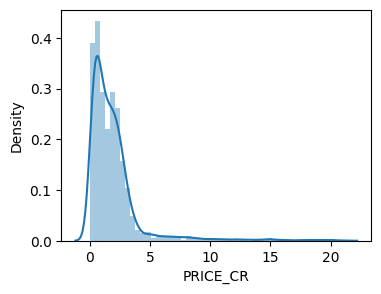

In [11]:
plt.figure(figsize = (4,3))
sns.distplot(df["PRICE_CR"])

In [12]:
df.shape

(7181, 24)

In [ ]:
# outliers.to_csv("outliers.csv", index = False)

On the basis of price col we can say that there are 525 outliers. On checking the source of data, I find out that most of these properties are genuine properties

Should I remove them?
Whether to remove or keep outliers in your dataset depends on the specific goals of your analysis and the context of your data. Outliers can be influential in statistical analysis and machine learning, and their treatment should be considered carefully. Here are some factors to consider when deciding whether to remove or keep outliers:

1. **Data Quality**: If you have verified that these outliers represent genuine data points and there are no errors in data collection or entry, it may be a valid reason to keep them. Removing genuine data can lead to a loss of valuable information.

2. **Analysis Objective**: Consider the purpose of your analysis. If your analysis aims to understand the entire range of property prices, including high-end properties, then keeping the outliers may be necessary. On the other hand, if you are interested in a specific segment of the market, removing outliers might be more appropriate.

3. **Model Performance**: In some cases, outliers can negatively impact the performance of statistical models. If you plan to build predictive models, outliers can lead to model instability or biased results. You may want to assess how including or excluding outliers affects model performance.

4. **Data Distribution**: Examine the distribution of the 'PRICE_CR' column. If the distribution is highly skewed or not normal, outliers may be more common. In such cases, you might consider using robust statistical methods that are less sensitive to outliers.

5. **Context**: Consider the context of the real estate market in which these properties exist. Extremely high-priced properties might indeed be rare but still relevant in certain markets.

6. **Data Size**: The number of outliers relative to the size of your dataset matters. If you have a large dataset and a small number of outliers, their impact on overall analysis might be limited.

7. **Stakeholder Requirements**: Consult with stakeholders or subject matter experts if they have specific requirements or preferences regarding the treatment of outliers.

In summary, it's not necessary to remove outliers simply because they are extreme values. Instead, carefully consider the impact of outliers on your analysis, model, and objectives. You can choose to keep them, transform them, or use robust statistical techniques to mitigate their influence if needed. The decision should align with your analytical goals and domain knowledge.

# Price_per_sqft

<ipython-input-13-7c0f8393fcf2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PRICE_SQFT"])


<Axes: xlabel='PRICE_SQFT', ylabel='Density'>

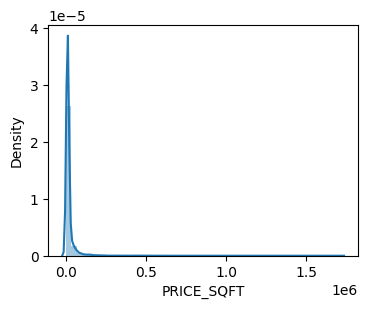

In [13]:
plt.figure(figsize = (4,3))
sns.distplot(df["PRICE_SQFT"])

<Axes: >

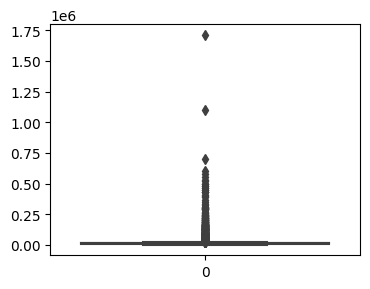

In [14]:
plt.figure(figsize = (4,3))
sns.boxplot(df["PRICE_SQFT"])

In [15]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [16]:
df["PRICE_SQFT"].describe()

count      7181
mean      20093
std       44057
min           3
25%        8571
50%       11583
75%       15714
max     1714285
Name: PRICE_SQFT, dtype: float64

In [17]:
df["PRICE_SQFT"].quantile([0.90, 0.94, 0.95, 0.99, 0.995])

1    34028
1    52995
1    61274
1   176000
1   261119
Name: PRICE_SQFT, dtype: float64

In [18]:
df[df["PRICE_SQFT"] > 50000].shape

(464, 24)

In [19]:
# Calculate the IQR for the 'PRICE_SQFT' column
Q1 = df["PRICE_SQFT"].quantile(0.25)
Q3 = df["PRICE_SQFT"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify Outliers
outliers = df[(df['PRICE_SQFT'] < lower_bound) | (df['PRICE_SQFT'] > upper_bound)]

# number of outliers
num_outliers = outliers.shape[0]
print("num of outliers : ", num_outliers)

outliers_price_stats = outliers['PRICE_SQFT'].describe()
print("outliers stats : ")
print(outliers_price_stats)

num of outliers :  912
outliers stats : 
count       912
mean      81909
std      103747
min       26455
25%       36111
50%       51081
75%       83893
max     1714285
Name: PRICE_SQFT, dtype: float64


In [20]:
# df.to_csv("outliers.csv", index = False)

In [ ]:
# outliers[["PROP_ID", "PROPERTY_TYPE", "BEDROOM_NUM", "PRICE", "PRICE_SQFT", "AREA_SQFT", "CALCULATED_AREA_SQFT"]].sort_values(by = "PRICE_SQFT", ascending = False)

(1015, 7)

In [ ]:
# outliers[outliers["CALCULATED_AREA_SQFT"] < 1000][["PROP_ID", "PROPERTY_TYPE", "BEDROOM_NUM", "PRICE", "PRICE_SQFT", "AREA_SQFT", "CALCULATED_AREA_SQFT"]].sort_values(by = "PRICE_SQFT", ascending = False)

(576, 7)

In [ ]:
# outliers_to_delete = outliers[outliers["CALCULATED_AREA_SQFT"] < 1000]["PROP_ID"].values

In [ ]:
# index_to_delete = df[df["PROP_ID"].isin(outliers_to_delete)].index
# # df.drop(index = index_to_delete, inplace = True)

<ipython-input-58-7c0f8393fcf2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PRICE_SQFT"])


<Axes: xlabel='PRICE_SQFT', ylabel='Density'>

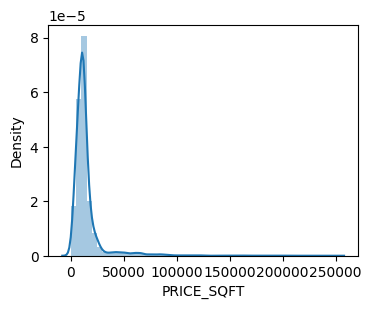

In [ ]:
# plt.figure(figsize = (4,3))
# sns.distplot(df["PRICE_SQFT"])

<Axes: >

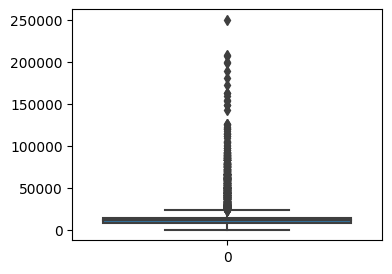

In [ ]:
# plt.figure(figsize = (4,3))
# sns.boxplot(df["PRICE_SQFT"])

In [21]:
df["PRICE_SQFT"].describe()

count      7181
mean      20093
std       44057
min           3
25%        8571
50%       11583
75%       15714
max     1714285
Name: PRICE_SQFT, dtype: float64

In [22]:
df["PRICE_SQFT"].quantile(0.95)

61274.0

In [23]:
index_to_delete = df[df["PRICE_SQFT"] > 50000].index

In [24]:
df.drop(index = index_to_delete, inplace = True)

<ipython-input-25-7c0f8393fcf2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PRICE_SQFT"])


<Axes: xlabel='PRICE_SQFT', ylabel='Density'>

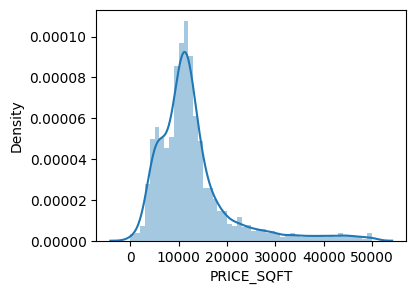

In [25]:
plt.figure(figsize = (4,3))
sns.distplot(df["PRICE_SQFT"])

<Axes: >

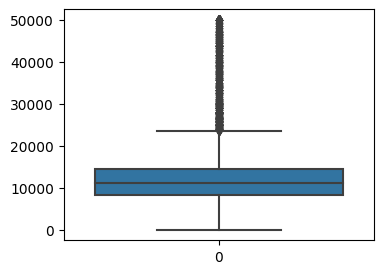

In [26]:
plt.figure(figsize = (4,3))
sns.boxplot(df["PRICE_SQFT"])

In [27]:
df["PRICE_SQFT"].describe()

count    6717
mean    12809
std      8068
min         3
25%      8222
50%     11200
75%     14390
max     50000
Name: PRICE_SQFT, dtype: float64

In [28]:
df["PRICE_SQFT"].quantile([0.01])

0   2512
Name: PRICE_SQFT, dtype: float64

In [29]:
index_to_delete = df[df["PRICE_SQFT"] < 2000].index
df.drop(index = index_to_delete, inplace = True)

Area

<Axes: xlabel='CALCULATED_AREA_SQFT', ylabel='Count'>

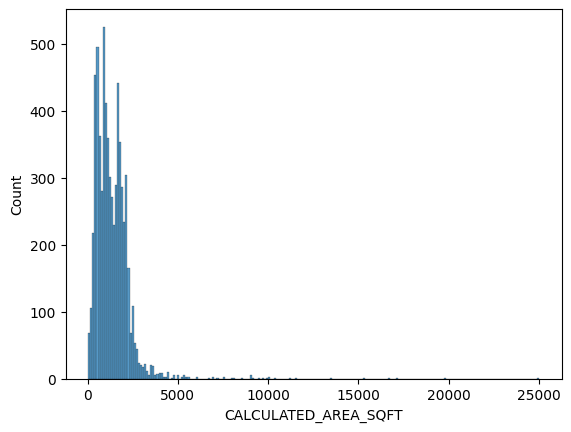

In [30]:
sns.histplot(df["CALCULATED_AREA_SQFT"])

<Axes: xlabel='CALCULATED_AREA_SQFT'>

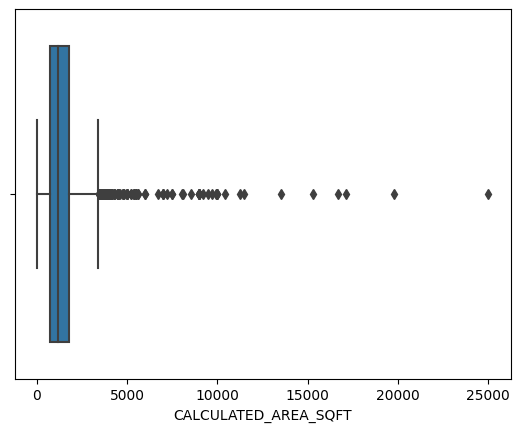

In [31]:
sns.boxplot(x = df["CALCULATED_AREA_SQFT"])

In [32]:
df["CALCULATED_AREA_SQFT"].describe()

count    6673
mean     1360
std      1032
min        35
25%       720
50%      1200
75%      1800
max     25000
Name: CALCULATED_AREA_SQFT, dtype: float64

In [33]:
Q1 = df["CALCULATED_AREA_SQFT"].quantile(0.25)
Q3 = df["CALCULATED_AREA_SQFT"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("lower bound: ", lower_bound)
print("upper bound: ", upper_bound)
# Identify Outliers
outliers = df[(df['CALCULATED_AREA_SQFT'] < lower_bound) | (df['CALCULATED_AREA_SQFT'] > upper_bound)]

# number of outliers
num_outliers = outliers.shape[0]
print("num of outliers : ", num_outliers)

outliers_price_stats = outliers['CALCULATED_AREA_SQFT'].describe()
print("outliers stats : ")
print(outliers_price_stats)

lower bound:  -899.9098429214014
upper bound:  3419.959458757796
num of outliers :  145
outliers stats : 
count     145
mean     5555
std      3332
min      3420
25%      3600
50%      4149
75%      5500
max     25000
Name: CALCULATED_AREA_SQFT, dtype: float64


In [34]:
df["CALCULATED_AREA_SQFT"].quantile([0.99])

1   4368
Name: CALCULATED_AREA_SQFT, dtype: float64

In [35]:
df = df.loc[df["CALCULATED_AREA_SQFT"] < 5000]

In [36]:
df.shape

(6623, 24)

Bedroom

<Axes: xlabel='BEDROOM_NUM'>

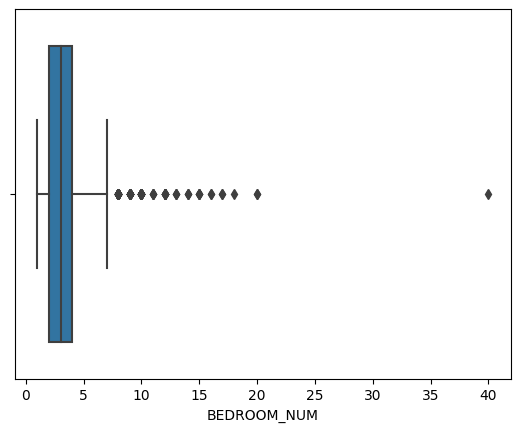

In [37]:
sns.boxplot(x = df["BEDROOM_NUM"])

In [38]:
df["BEDROOM_NUM"].describe()

count   6623
mean       3
std        2
min        1
25%        2
50%        3
75%        4
max       40
Name: BEDROOM_NUM, dtype: float64

In [39]:
index_to_delete = df[df["BEDROOM_NUM"] >= 15].index
df.drop(index = index_to_delete, inplace = True)

Area Room Ratio

In [40]:
def area_room_ratio(df_row):
  if df_row["PROPERTY_TYPE"] == 'house':
    if df_row["TOTAL_FLOOR"] != 0:
      area_room_ratio = (df_row["CALCULATED_AREA_SQFT"] * df_row["TOTAL_FLOOR"])/(df_row["BEDROOM_NUM"])
    else:
      area_room_ratio = (df_row["CALCULATED_AREA_SQFT"])/(df_row["BEDROOM_NUM"])
  elif df_row["PROPERTY_TYPE"] == 'flat':
    area_room_ratio = (df_row["CALCULATED_AREA_SQFT"])/(df_row["BEDROOM_NUM"])
  else:
    area_room_ratio = np.nan
  return area_room_ratio


In [41]:
df["AREA_ROOM_RATIO"] = df.apply(area_room_ratio, axis = 1)

In [42]:
df.shape

(6611, 25)

In [ ]:
# x = df[(df["PRICE_SQFT"] < 30000) & (df["PROPERTY_TYPE"] == "house")]
# (x["AREA_SQFT"] * x["TOTAL_FLOOR"]/x["BEDROOM_NUM"]).quantile(0.02)

90.00408620314063

In [ ]:
# df[((df["AREA_SQFT"] * x["TOTAL_FLOOR"]/df["BEDROOM_NUM"]) < 90) & (df["PROPERTY_TYPE"] == "house") ][["PROP_ID", "PROPERTY_TYPE", "BEDROOM_NUM", "PRICE_SQFT", "FLOOR_NUM", "TOTAL_FLOOR","AREA_SQFT", "PRICE", "PRICE_CR"]]

In [ ]:
# flat_df = df[df["PROPERTY_TYPE"] == 'flat']
# house_df = df[df["PROPERTY_TYPE"] == 'house']

In [ ]:
# house_df["b_f"] = house_df["BEDROOM_NUM"] / house_df["TOTAL_FLOOR"]

<ipython-input-68-ec0f2aa7e800>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df["b_f"] = house_df["BEDROOM_NUM"] / house_df["TOTAL_FLOOR"]


In [43]:
def bedroom_floor(df_row):
  if df_row["PROPERTY_TYPE"] == 'house':
    if df_row["TOTAL_FLOOR"] != 0:
      bedroom_floor = df_row["BEDROOM_NUM"]/df_row["TOTAL_FLOOR"]
    else:
      bedroom_floor = np.nan
  elif df_row["PROPERTY_TYPE"] == 'flat':
      bedroom_floor = df_row["BEDROOM_NUM"]
  else:
      bedroom_floor = np.nan
  return bedroom_floor
df["BEDROOM_FLOOR"] = df.apply(bedroom_floor, axis = 1)

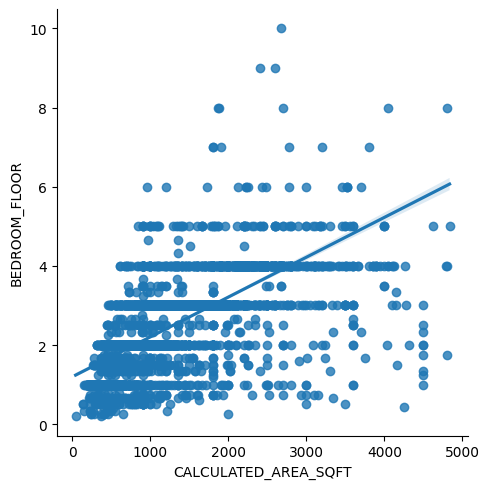

In [49]:
sns.lmplot(data = df, x = 'CALCULATED_AREA_SQFT', y = 'BEDROOM_FLOOR')

<Axes: xlabel='PRICE_SQFT', ylabel='Count'>

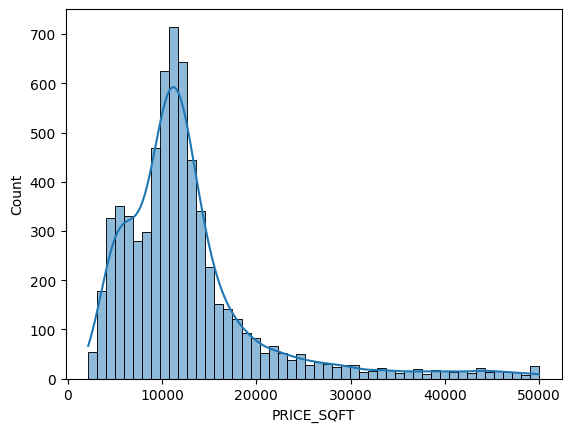

In [45]:
sns.histplot(df["PRICE_SQFT"], bins = 50, kde=True)

In [46]:
x = df[(df["PRICE_SQFT"] < 30000)]
(x["AREA_ROOM_RATIO"]).quantile(0.01)

149.99908126148424

In [47]:
index_to_delete = df[(df["AREA_ROOM_RATIO"] < 152)][["PROP_ID", "PROPERTY_TYPE", "BEDROOM_NUM","AREA_ROOM_RATIO", "PRICE_SQFT", "FLOOR_NUM", "TOTAL_FLOOR","AREA_SQFT", "PRICE", "PRICE_CR"]].sort_values("AREA_ROOM_RATIO").index

In [48]:
df.drop(index = index_to_delete, inplace = True)

In [50]:
df.drop(columns = ["AREA_ROOM_RATIO", "BEDROOM_FLOOR"], inplace = True)

In [51]:
df.head()

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,FLOOR_NUM,TOTAL_FLOOR,LATITUDE,LONGITUDE,AVAILABILITY,PRICE,PRICE_SQFT,PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT,AGE_POSSESSION,AMENITIES_CLUSTER,LUXURY_SCORE,PROP_NAME
0,G71293060,flat,Central Delhi,Karol Bagh,Freehold,6,0,NaN,NaN,NaN,1,32,29,77,Under Construction,103000000,32461,10,3173,3526,Under Construction,Basic,0,Unity Group The Amaryllis
1,Y71293054,flat,Central Delhi,Karol Bagh,Freehold,5,6,NaN,NaN,NaN,1,32,29,77,Under Construction,102983146,32461,10,3173,3173,Under Construction,Basic,0,Unity Group The Amaryllis
2,D71293050,flat,Central Delhi,Karol Bagh,Freehold,4,4,NaN,NaN,NaN,1,32,29,77,Under Construction,62362438,33233,6,1877,1877,Under Construction,Basic,0,Unity Group The Amaryllis
3,B71293046,flat,Central Delhi,Karol Bagh,Freehold,3,3,NaN,NaN,NaN,1,32,29,77,Under Construction,30500000,30214,3,1009,1009,Under Construction,Basic,0,Unity Group The Amaryllis
4,A71293042,flat,Central Delhi,Karol Bagh,Freehold,2,2,NaN,NaN,NaN,1,32,29,77,Under Construction,19500156,26316,2,741,823,Under Construction,Basic,0,Unity Group The Amaryllis


In [52]:
df.shape

(6459, 24)

In [55]:
df.to_csv("flat_houses_v5(2).csv", index = False)